# This code generates figure 5a~f

In [89]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [91]:
X=np.load('rainfed_maize_production_Xgrid.npy')
Y=np.load('rainfed_maize_production_Ygrid.npy')

In [92]:
pnt_IA=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IA.csv')
pnt_MN=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MN.csv')
pnt_WI=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_WI.csv')
pnt_IL=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IL.csv')
pnt_MI=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MI.csv')
pnt_IN=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_IN.csv')
pnt_OH=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_OH.csv')
pnt_NY=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_NY.csv')
pnt_PA=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_PA.csv')
pnt_MD=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_MD.csv')
pnt_ON=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_ON.csv')
pnt_QC=pd.read_csv('state_province_gridcell_csvfiles\Gridcell_QC.csv')

In [93]:
pnt_IA

,Unnamed: 0,lon,lat,coords
0,2587,-96.25,43.25,POINT (-96.25 43.25)
1,2588,-95.75,43.25,POINT (-95.75 43.25)
2,2589,-95.25,43.25,POINT (-95.25 43.25)
3,2590,-94.75,43.25,POINT (-94.75 43.25)
4,2591,-94.25,43.25,POINT (-94.25 43.25)
...,...,...,...,...
60,2893,-93.25,40.75,POINT (-93.25 40.75)
61,2894,-92.75,40.75,POINT (-92.75 40.75)
62,2895,-92.25,40.75,POINT (-92.25 40.75)
63,2896,-91.75,40.75,POINT (-91.75 40.75)


In [94]:
# df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
# thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']

In [95]:
# generated by /media/Data1/Climada/isimip3/B3_read_ISIMIP3b_yields-maize.ipynb
#prod60X60=np.full((60, 60, 12,5), np.nan)  #X, Y, ggcm,gcm 
production_1995to2014_isimip3a=np.load('/media/Data1/Climada/isimip3/isimip3b_production_60X60X12ggcmsX5gcms.npy')
spam_production=np.load('average_all.npy')

In [96]:
spam_production[np.isnan(spam_production)]=0

In [97]:
spam_production

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [4301.59998393,    0.        , 5752.33333969, ...,    0.        ,
           0.        ,    0.        ],
       [ 370.86666759,  468.93333173, 2814.73337785, ...,    0.        ,
           0.        ,    0.        ],
       [ 794.46667671, 2221.56664832, 5497.20001849, ...,    0.        ,
           0.        ,    0.        ]])

In [98]:
np.max(spam_production)

1383751.9262981415

In [99]:
np.max(spam_production.flatten())

1383751.9262981415

## Calculate 12 provinces/states production from isimip3a

### 1. 20-year averages

In [100]:
#20-year average
# for 5 GCM
#gcms=['gfdl-esm4','ipsl-cm6a-lr','mpi-esm1-2-hr','mri-esm2-0','ukesm1-0-ll']
for igcm in range(5):
    df = pd.DataFrame(columns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs'])
    thecolumns=['Province/State', 'm1', 'm2','m3', 'm4','m5', 'm6','m7', 'm8','m9', 'm10','m11', 'En','obs']    

    Data=production_1995to2014_isimip3a[:,:,:,igcm]
    #Ontario
    pp=np.empty(shape=(13))
    ptlist=list(pnt_ON['Unnamed: 0'])

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)
    df = pd.concat([df, pd.DataFrame([['Ontario (ON)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Quibec
    pp=np.empty(shape=(13))
    ptlist=list(pnt_QC['Unnamed: 0'])

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)   
    df = pd.concat([df, pd.DataFrame([['Quebec (QC)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


    #'Iowa (IA)'
    pp=np.empty(shape=(13))
    ptlist=list(pnt_IA['Unnamed: 0'])

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Iowa (IA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Minnesota(MN)
    pp=np.empty(shape=(13))
    ptlist=list(pnt_MN['Unnamed: 0'])

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Minnesota(MN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Wisconsin(WI)
    ptlist=list(pnt_WI['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Wisconsin(WI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Illinois(IL)
    ptlist=list(pnt_IL['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Illinois(IL)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Michigan(MI)
    ptlist=list(pnt_MI['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Michigan(MI)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Indiana(IN)
    ptlist=list(pnt_IN['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Indiana(IN)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)


    #Ohio (OH)
    ptlist=list(pnt_OH['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Ohio (OH)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #New York (NY)
    ptlist=list(pnt_NY['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['New York (NY)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Pennsylvania(PA)
    ptlist=list(pnt_PA['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Pennsylvania(PA)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    #Maryland(MD)
    ptlist=list(pnt_MD['Unnamed: 0'])
    pp=np.empty(shape=(13))

    for ii in range(12):
        thedata=Data[:,:,ii].flatten()[ptlist]
        pp[ii]=np.around(np.nansum(thedata),0)
    thedata=spam_production.flatten()[ptlist]    
    pp[12]=np.around(np.nansum(thedata),0)          
    df = pd.concat([df, pd.DataFrame([['Maryland(MD)',pp[0],pp[1],pp[2],pp[3],pp[4],pp[5],pp[6],pp[7],pp[8],pp[9],pp[10],pp[11],pp[12]]], columns=thecolumns)], ignore_index=True)

    if igcm==0:
        df['En']=df.iloc[:,1:12].mean(axis=1)
        display(df)
        df.to_csv(('GCM1_isimip3b_12states_production_1995to2014.csv'))
    if igcm==1:
        df['En']=df.iloc[:,1:12].mean(axis=1)
        display(df)
        df.to_csv(('GCM2_isimip3b_12states_production_1995to2014.csv'))
    if igcm==2:
        df['En']=df.iloc[:,2:12].mean(axis=1)
        display(df)
        df.to_csv(('GCM3_isimip3b_12states_production_1995to2014.csv'))
    if igcm==3:
        df['En']=df.iloc[:,2:12].mean(axis=1)        
        display(df)
        df.to_csv(('GCM4_isimip3b_12states_production_1995to2014.csv'))
    if igcm==4:
        df['En']=df.iloc[:,2:12].mean(axis=1)        
        display(df)
        df.to_csv(('GCM5_isimip3b_12states_production_1995to2014.csv'))
                                        

,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),9233985.0,5522503.0,8697529.0,7678141.0,5981363.0,7291238.0,6371378.0,8246815.0,7534096.0,5604326.0,3926872.0,6.917113e+06,2622766.0
1,Quebec (QC),5105716.0,2893048.0,4273482.0,3720167.0,3310006.0,4128082.0,3533527.0,4020375.0,4003662.0,3012098.0,2276699.0,3.661533e+06,1493464.0
2,Iowa (IA),50082947.0,23141813.0,38846058.0,22867832.0,35182467.0,32705104.0,31171468.0,45109052.0,41031752.0,20998223.0,21112109.0,3.293171e+07,52161618.0
3,Minnesota(MN),27998990.0,12648191.0,22842879.0,14197371.0,18224477.0,18957422.0,18400227.0,25910987.0,22102581.0,13814342.0,10793187.0,1.871733e+07,29552040.0
4,Wisconsin(WI),16979295.0,6646314.0,12642831.0,9335961.0,9946524.0,11738423.0,10448629.0,13256024.0,13321490.0,8408818.0,7667819.0,1.094474e+07,11515741.0
5,Illinois(IL),43392090.0,22914678.0,32523965.0,18322589.0,30935146.0,28962513.0,28789469.0,36383818.0,36498121.0,20547471.0,16068044.0,2.866708e+07,47669473.0
6,Michigan(MI),12343854.0,5331316.0,10688618.0,8379490.0,7746817.0,8343884.0,7986484.0,9291889.0,9899357.0,6403274.0,4803213.0,8.292563e+06,7118776.0
7,Indiana(IN),26860673.0,11748240.0,18967762.0,13035310.0,17129661.0,15403195.0,16334925.0,18952523.0,20478829.0,12711455.0,9665400.0,1.648072e+07,20731290.0
8,Ohio (OH),17751757.0,8645158.0,13767741.0,10360644.0,11860057.0,10499096.0,11457133.0,12586000.0,14009318.0,8084988.0,7021806.0,1.145852e+07,12502459.0
9,New York (NY),6659207.0,2390539.0,4303519.0,4091231.0,3422198.0,4256566.0,3716196.0,4420595.0,5165312.0,3130602.0,2731248.0,4.026110e+06,1574141.0


,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),9421969.0,5489822.0,8820849.0,8153181.0,6447795.0,7361403.0,6714395.0,8327155.0,7975976.0,4543578.0,4208804.0,7.042266e+06,2622766.0
1,Quebec (QC),4908441.0,2913119.0,4457282.0,4097806.0,3843771.0,4221073.0,3732636.0,4230022.0,4383335.0,2406669.0,2814678.0,3.818985e+06,1493464.0
2,Iowa (IA),45778121.0,23257299.0,36532619.0,22490802.0,35726893.0,32450298.0,32727956.0,44578263.0,40717532.0,17685131.0,20802204.0,3.206792e+07,52161618.0
3,Minnesota(MN),24302007.0,12502919.0,22142215.0,13978637.0,18247243.0,18782960.0,19176689.0,27539204.0,21597334.0,11501468.0,9682728.0,1.813213e+07,29552040.0
4,Wisconsin(WI),15940086.0,6557234.0,11973198.0,8774807.0,10128892.0,11651556.0,10709832.0,13374859.0,13290750.0,6497129.0,6993717.0,1.053564e+07,11515741.0
5,Illinois(IL),43435127.0,23025445.0,31075746.0,17549887.0,32370996.0,28711625.0,30201177.0,35969614.0,37200455.0,17279241.0,15760417.0,2.841634e+07,47669473.0
6,Michigan(MI),11992361.0,5280333.0,10295875.0,8687746.0,7907449.0,8369218.0,8324745.0,9401142.0,9988034.0,5362381.0,4635496.0,8.204071e+06,7118776.0
7,Indiana(IN),26462733.0,11830490.0,18334118.0,12882649.0,17881515.0,15374984.0,16934831.0,18707251.0,20849483.0,10799032.0,9268686.0,1.630234e+07,20731290.0
8,Ohio (OH),17162309.0,8651588.0,13103455.0,10101776.0,11941049.0,10510924.0,11657323.0,12123972.0,13877036.0,6666146.0,6261846.0,1.109613e+07,12502459.0
9,New York (NY),6736079.0,2388063.0,4193652.0,4141096.0,3534918.0,4294758.0,3880214.0,4464983.0,5369638.0,2277758.0,2860795.0,4.012905e+06,1574141.0


,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),0.0,5621213.0,8794404.0,7896255.0,6616190.0,7304898.0,6571883.0,8373676.0,7966020.0,5652084.0,4642701.0,6943932.4,2622766.0
1,Quebec (QC),0.0,2902632.0,4147952.0,3500384.0,3395594.0,3959689.0,3476770.0,3663130.0,3929422.0,2876222.0,2400406.0,3425220.1,1493464.0
2,Iowa (IA),0.0,23381792.0,40234197.0,23201091.0,36109267.0,32004341.0,31347512.0,46179981.0,41016751.0,22188061.0,23649352.0,31931234.5,52161618.0
3,Minnesota(MN),0.0,12661053.0,23645681.0,14337328.0,18289060.0,18622438.0,18443762.0,26749977.0,21372049.0,13344344.0,10522756.0,17798844.8,29552040.0
4,Wisconsin(WI),0.0,6760153.0,13169603.0,9663794.0,10243080.0,11705944.0,10375719.0,13811526.0,13190315.0,8090950.0,7565200.0,10457628.4,11515741.0
5,Illinois(IL),0.0,23424259.0,34935067.0,18796659.0,32851292.0,28668346.0,29506834.0,37536326.0,37833803.0,21890760.0,18860369.0,28430371.5,47669473.0
6,Michigan(MI),0.0,5384186.0,11219136.0,8602436.0,8103676.0,8368726.0,8159642.0,9653907.0,10069564.0,6344514.0,4845766.0,8075155.3,7118776.0
7,Indiana(IN),0.0,12121916.0,20160367.0,13447775.0,18507997.0,15321749.0,16637394.0,19558157.0,21471304.0,13884839.0,11408844.0,16252034.2,20731290.0
8,Ohio (OH),0.0,8920296.0,14455421.0,10663916.0,12491664.0,10473081.0,11529196.0,13002054.0,14185286.0,8277689.0,7743839.0,11174244.2,12502459.0
9,New York (NY),0.0,2401396.0,4310830.0,4190870.0,3655107.0,4255510.0,3828035.0,4443423.0,5375203.0,3006689.0,3173363.0,3864042.6,1574141.0


,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),0.0,5621312.0,8888626.0,8000642.0,6495763.0,7361260.0,6546157.0,8271712.0,8027770.0,6236759.0,4275167.0,6972516.8,2622766.0
1,Quebec (QC),0.0,3032456.0,4401143.0,3854577.0,3675483.0,4215040.0,3596218.0,4114970.0,4215633.0,3240403.0,2701164.0,3704708.7,1493464.0
2,Iowa (IA),0.0,23627078.0,39804397.0,23181918.0,37383746.0,32812344.0,32423633.0,47403691.0,43924727.0,23392669.0,24549758.0,32850396.1,52161618.0
3,Minnesota(MN),0.0,12815068.0,23614920.0,14615666.0,19553714.0,19096654.0,18645213.0,28723953.0,23421920.0,14373049.0,10984642.0,18584479.9,29552040.0
4,Wisconsin(WI),0.0,6756050.0,13005458.0,9558862.0,10794054.0,11845706.0,10599766.0,14314495.0,14272536.0,8979771.0,7922221.0,10804891.9,11515741.0
5,Illinois(IL),0.0,23431309.0,34023173.0,18696354.0,32101724.0,29030043.0,29281300.0,36177109.0,37658205.0,21691893.0,18567961.0,28065907.1,47669473.0
6,Michigan(MI),0.0,5386389.0,10994095.0,8660740.0,8136703.0,8494194.0,8161502.0,9416384.0,10454181.0,6894288.0,5003040.0,8160151.6,7118776.0
7,Indiana(IN),0.0,12161553.0,20170781.0,13649349.0,17874285.0,15494253.0,16575646.0,19411281.0,21056173.0,13866212.0,10746694.0,16100622.7,20731290.0
8,Ohio (OH),0.0,8876471.0,14245152.0,10677714.0,12070039.0,10537349.0,11348710.0,12785206.0,14123759.0,8403307.0,7481182.0,11054888.9,12502459.0
9,New York (NY),0.0,2455437.0,4315926.0,4261921.0,3637792.0,4308825.0,3795870.0,4574984.0,5464623.0,3228783.0,3078092.0,3912225.3,1574141.0


,Province/State,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,En,obs
0,Ontario (ON),0.0,5405064.0,8766502.0,7466568.0,6047827.0,7279516.0,6470070.0,8164734.0,7482609.0,4815330.0,3590021.0,6548824.1,2622766.0
1,Quebec (QC),0.0,2872829.0,4323080.0,3818207.0,3505550.0,4186673.0,3633140.0,4043744.0,4153581.0,2703261.0,2441400.0,3568146.5,1493464.0
2,Iowa (IA),0.0,22588502.0,38330663.0,22553515.0,34615834.0,32616548.0,31635929.0,43649967.0,39683057.0,18202844.0,22109673.0,30598653.2,52161618.0
3,Minnesota(MN),0.0,11956006.0,22296627.0,13442429.0,17977141.0,18686184.0,18134156.0,25933186.0,21114981.0,11570880.0,9835745.0,17094733.5,29552040.0
4,Wisconsin(WI),0.0,6446204.0,12324256.0,9127360.0,10137838.0,11659199.0,10415337.0,12954559.0,13141448.0,7001473.0,7162222.0,10036989.6,11515741.0
5,Illinois(IL),0.0,22558465.0,31963571.0,18191532.0,30764664.0,28831846.0,29669455.0,34999606.0,35564019.0,18550276.0,15002189.0,26609562.3,47669473.0
6,Michigan(MI),0.0,5200095.0,10572446.0,8105279.0,7746418.0,8301201.0,8049082.0,8885054.0,9603008.0,5657796.0,4322938.0,7644331.7,7118776.0
7,Indiana(IN),0.0,11823392.0,18870869.0,13276341.0,17386338.0,15302609.0,16619558.0,18313575.0,20344242.0,11518944.0,9417931.0,15287379.9,20731290.0
8,Ohio (OH),0.0,8516288.0,13622926.0,10446807.0,11846284.0,10457387.0,11430846.0,12020961.0,13659233.0,7096069.0,6633044.0,10572984.5,12502459.0
9,New York (NY),0.0,2375673.0,4160445.0,4032478.0,3416422.0,4262675.0,3780849.0,4339267.0,5058697.0,2455941.0,2586669.0,3646911.6,1574141.0


In [101]:
#gcms=['gfdl-esm4','ipsl-cm6a-lr','mpi-esm1-2-hr','mri-esm2-0','ukesm1-0-ll']
GCMs_df = pd.DataFrame(columns=['Province/State', 'gfdl-esm4','ipsl-cm6a-lr','mpi-esm1-2-hr','mri-esm2-0','ukesm1-0-ll', 'En','obs'])
thecolumns=['Province/State', 'gfdl-esm4','ipsl-cm6a-lr','mpi-esm1-2-hr','mri-esm2-0','ukesm1-0-ll', 'En','obs']    


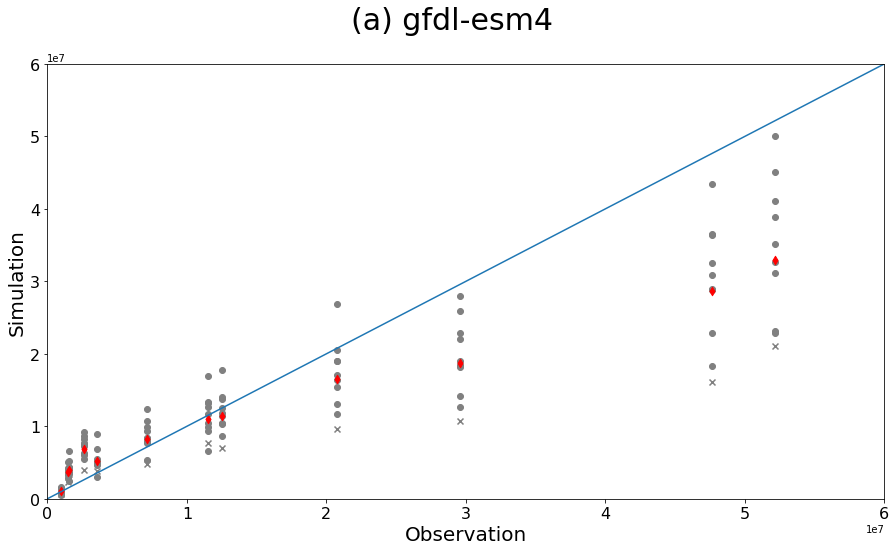

In [102]:
df=pd.read_csv('GCM1_isimip3b_12states_production_1995to2014.csv')
GCMs_df['gfdl-esm4']=df['En']

fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(a) gfdl-esm4', fontsize=30)
fig.savefig('Figure5A_isimip3b_production_states_20yearAverage_gfdl-esm4.png',dpi=150)

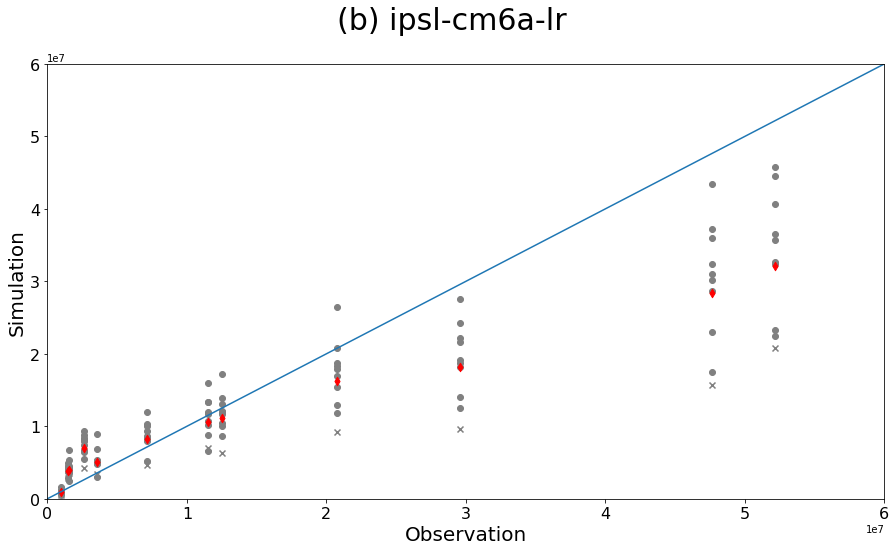

In [103]:
df=pd.read_csv('GCM2_isimip3b_12states_production_1995to2014.csv')
GCMs_df['ipsl-cm6a-lr']=df['En']

fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(b) ipsl-cm6a-lr', fontsize=30)
fig.savefig('Figure5B_isimip3b_production_states_20yearAverage_ipsl-cm6a-lr.png',dpi=150)

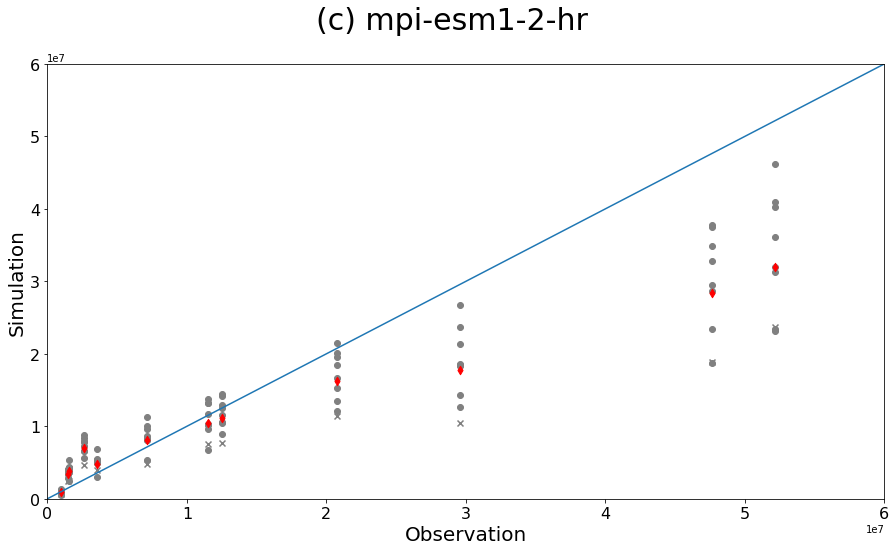

In [104]:
df=pd.read_csv('GCM3_isimip3b_12states_production_1995to2014.csv')
GCMs_df['mpi-esm1-2-hr']=df['En']
fig = plt.figure(figsize=(15, 8))

#plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(c) mpi-esm1-2-hr', fontsize=30)
fig.savefig('Figure5C_isimip3b_production_states_20yearAverage_mpi-esm1-2-hr.png',dpi=150)

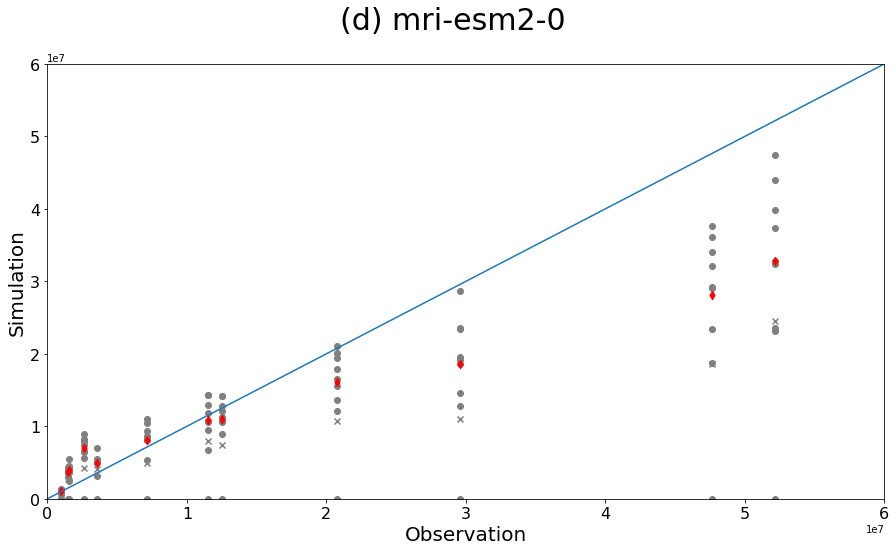

In [105]:
df=pd.read_csv('GCM4_isimip3b_12states_production_1995to2014.csv')
GCMs_df['mri-esm2-0']=df['En']
fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(d) mri-esm2-0', fontsize=30)
fig.savefig('Figure5D_isimip3b_production_states_20yearAverage_mri-esm2-0.png',dpi=150)

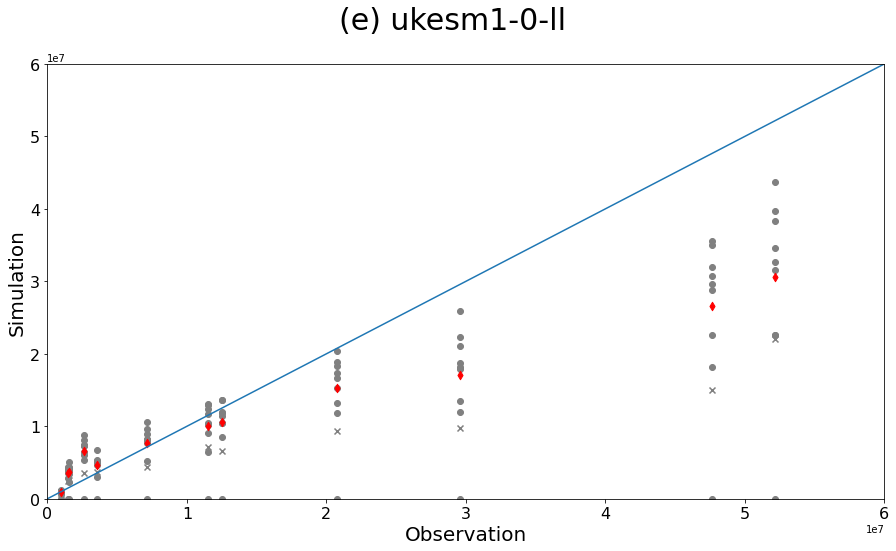

In [106]:
df=pd.read_csv('GCM5_isimip3b_12states_production_1995to2014.csv')
GCMs_df['ukesm1-0-ll']=df['En']
GCMs_df['obs']=df['obs']
GCMs_df['Province/State']=df['Province/State']
GCMs_df['En']=GCMs_df.iloc[:,1:6].mean(axis=1)
fig = plt.figure(figsize=(15, 8))

plt.scatter(df['obs'],df['m1'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m2'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m3'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m5'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m6'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m7'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m8'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['m9'],color='grey', marker='o', label='Data Points') 
#plt.scatter(df['obs'],df['m10'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['m11'],color='grey', marker='x', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(e) ukesm1-0-ll', fontsize=30)
fig.savefig('Figure5E_isimip3b_production_states_20yearAverage_ukesm1-0-ll.png',dpi=150)

In [107]:
GCMs_df

,Province/State,gfdl-esm4,ipsl-cm6a-lr,mpi-esm1-2-hr,mri-esm2-0,ukesm1-0-ll,En,obs
0,Ontario (ON),6.917113e+06,7.042266e+06,6943932.4,6972516.8,6548824.1,6.884931e+06,2622766.0
1,Quebec (QC),3.661533e+06,3.818985e+06,3425220.1,3704708.7,3568146.5,3.635719e+06,1493464.0
2,Iowa (IA),3.293171e+07,3.206792e+07,31931234.5,32850396.1,30598653.2,3.207598e+07,52161618.0
3,Minnesota(MN),1.871733e+07,1.813213e+07,17798844.8,18584479.9,17094733.5,1.806550e+07,29552040.0
4,Wisconsin(WI),1.094474e+07,1.053564e+07,10457628.4,10804891.9,10036989.6,1.055598e+07,11515741.0
5,Illinois(IL),2.866708e+07,2.841634e+07,28430371.5,28065907.1,26609562.3,2.803785e+07,47669473.0
6,Michigan(MI),8.292563e+06,8.204071e+06,8075155.3,8160151.6,7644331.7,8.075255e+06,7118776.0
7,Indiana(IN),1.648072e+07,1.630234e+07,16252034.2,16100622.7,15287379.9,1.608462e+07,20731290.0
8,Ohio (OH),1.145852e+07,1.109613e+07,11174244.2,11054888.9,10572984.5,1.107135e+07,12502459.0
9,New York (NY),4.026110e+06,4.012905e+06,3864042.6,3912225.3,3646911.6,3.892439e+06,1574141.0


In [108]:
np.mean([6.917113e+06,7.042266e+06,6943932.4,6972516.8,6548824.1])

6884930.459999999

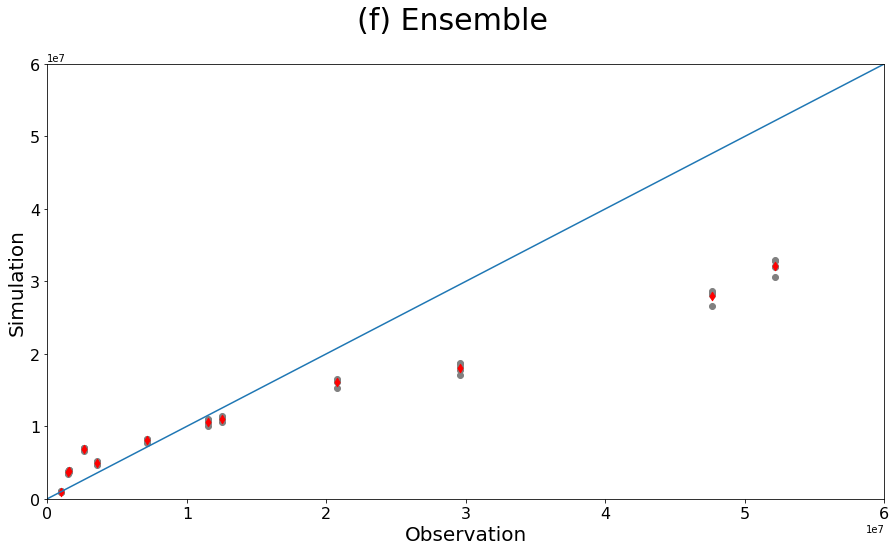

In [113]:
fig = plt.figure(figsize=(15, 8))
df=GCMs_df
plt.scatter(df['obs'],df['gfdl-esm4'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['ipsl-cm6a-lr'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['mpi-esm1-2-hr'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['mri-esm2-0'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['ukesm1-0-ll'],color='grey', marker='o', label='Data Points') 
plt.scatter(df['obs'],df['En'],color='red', marker='d', label='Data Points') 
plt.xlabel('Observation', fontsize=20)
plt.ylabel('Simulation',fontsize=20)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlim([0,6e7])
plt.ylim([0,6e7])

plt.plot([0,6e7],[0,6e7])
#plt.ylabel('Simulation')
plt.suptitle('(f) Ensemble', fontsize=30)
fig.savefig('Figure5F_isimip3b_production_states_20yearAverage_Ensemble.png',dpi=150)